<a href="https://colab.research.google.com/github/K-Y-U/ToyProject/blob/main/Fashion_MNIST(Drop_Out).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import helper
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable



# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


100%|██████████| 26421880/26421880 [00:02<00:00, 11074475.05it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 207856.01it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3712064.10it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9331148.22it/s]


Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



In [2]:
def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


In [3]:
def test_network(net, trainloader):

    criterion = nn.MSELoss()
    optimizer = optim.Adam(net.parameters(), lr=0.001)

    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # Create Variables for the inputs and targets
    inputs = Variable(images)
    targets = Variable(images)

    # Clear the gradients from all Variables
    optimizer.zero_grad()

    # Forward pass, then backward pass, then update weights
    output = net.forward(inputs)
    loss = criterion(output, targets)
    loss.backward()
    optimizer.step()

    return True

In [4]:
def view_recon(img, recon):
    ''' Function for displaying an image (as a PyTorch Tensor) and its
        reconstruction also a PyTorch Tensor
    '''

    fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True)
    axes[0].imshow(img.numpy().squeeze())
    axes[1].imshow(recon.data.numpy().squeeze())
    for ax in axes:
        ax.axis('off')
        ax.set_adjustable('box-forced')

In [5]:
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

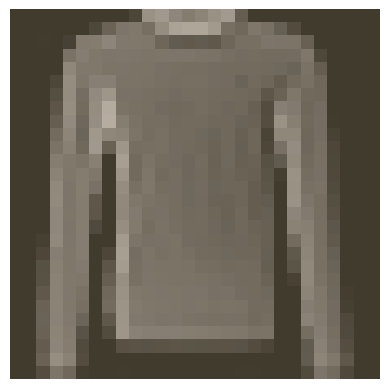

In [6]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [7]:
# 네트워크 만들기
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [8]:
# 네트워크 훈련해보기
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 20

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # 모델에서 훈련
        log_ps = model(images)
        # 오차 계산
        loss = criterion(log_ps, labels)

        # 초기화
        optimizer.zero_grad()
        # 역전파
        loss.backward()
        # 스텝
        optimizer.step()

        # 오차값을 총 오차에 더함
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.5111994185586219
Training loss: 0.39273515041035884
Training loss: 0.35288175827722307
Training loss: 0.331222230628101
Training loss: 0.3146973437051783
Training loss: 0.3036982100337807
Training loss: 0.2923947865647802
Training loss: 0.2869644483793646
Training loss: 0.27593112358056915
Training loss: 0.26483540919257886
Training loss: 0.2629589678080224
Training loss: 0.2521524181537854
Training loss: 0.24690414445677292
Training loss: 0.24419188205954998
Training loss: 0.2434399506247946
Training loss: 0.23132368695856667
Training loss: 0.22799033164453786
Training loss: 0.22209294622879167
Training loss: 0.22089183031877221
Training loss: 0.21731610087030478


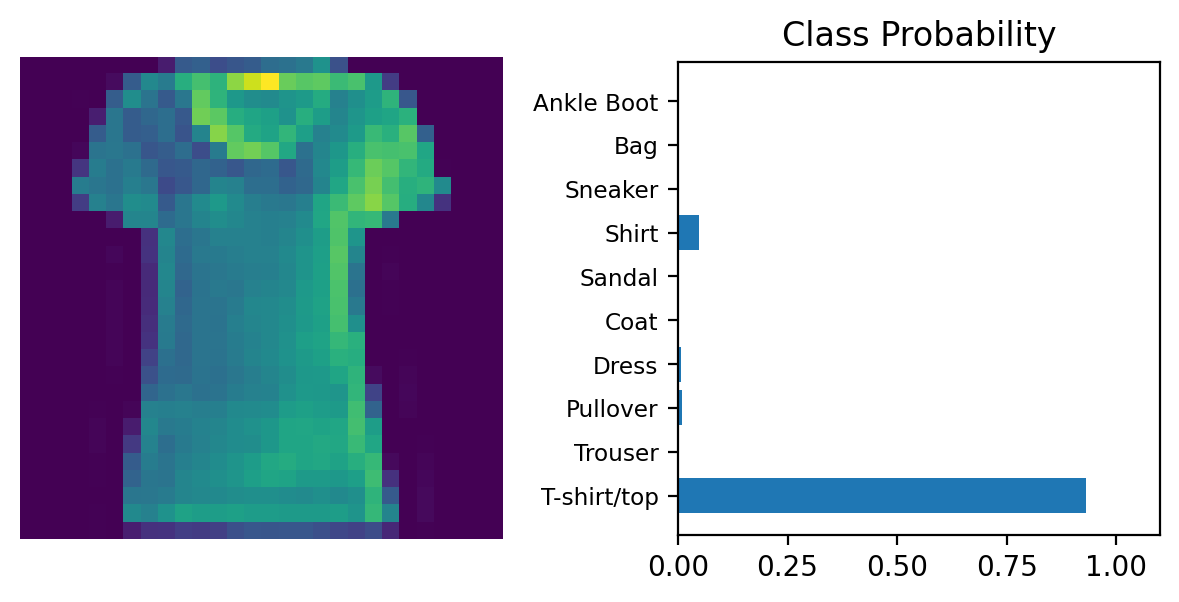

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


dataiter = iter(testloader)

images, labels = next(iter(trainloader))
img = images[0]
img = img.resize_(1, 784)
ps = torch.exp(model(img))
view_classify(img.resize_(1, 28, 28), ps, version='Fashion')


In [10]:
# Accuracy 확인하기!!

model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 20
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    else:
        test_loss = 0
        accuracy = 0

        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                # 로그 확률에 지수 적용
                ps = torch.exp(log_ps)
                # topk는 k번째로 큰 숫자를 찾아내는 것이다.
                # dim=1 는 dimension을 의미한다.
                top_p, top_class = ps.topk(1, dim=1)
                # labels를 top_class와 똑같은 형태로 만든 다음에, 얼마나 같은게 있는지 확인한다.
                equals = top_class == labels.view(*top_class.shape)
                # equals를 float으로 바꾸고 평균 정확도를 구한다.
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/20..  Training Loss: 0.516..  Test Loss: 0.451..  Test Accuracy: 0.835
Epoch: 2/20..  Training Loss: 0.394..  Test Loss: 0.420..  Test Accuracy: 0.852
Epoch: 3/20..  Training Loss: 0.356..  Test Loss: 0.398..  Test Accuracy: 0.859
Epoch: 4/20..  Training Loss: 0.334..  Test Loss: 0.390..  Test Accuracy: 0.862
Epoch: 5/20..  Training Loss: 0.317..  Test Loss: 0.386..  Test Accuracy: 0.863
Epoch: 6/20..  Training Loss: 0.303..  Test Loss: 0.375..  Test Accuracy: 0.871
Epoch: 7/20..  Training Loss: 0.295..  Test Loss: 0.372..  Test Accuracy: 0.869
Epoch: 8/20..  Training Loss: 0.282..  Test Loss: 0.359..  Test Accuracy: 0.872
Epoch: 9/20..  Training Loss: 0.276..  Test Loss: 0.395..  Test Accuracy: 0.862
Epoch: 10/20..  Training Loss: 0.266..  Test Loss: 0.356..  Test Accuracy: 0.879
Epoch: 11/20..  Training Loss: 0.263..  Test Loss: 0.361..  Test Accuracy: 0.882
Epoch: 12/20..  Training Loss: 0.253..  Test Loss: 0.374..  Test Accuracy: 0.877
Epoch: 13/20..  Training Loss: 0.247.

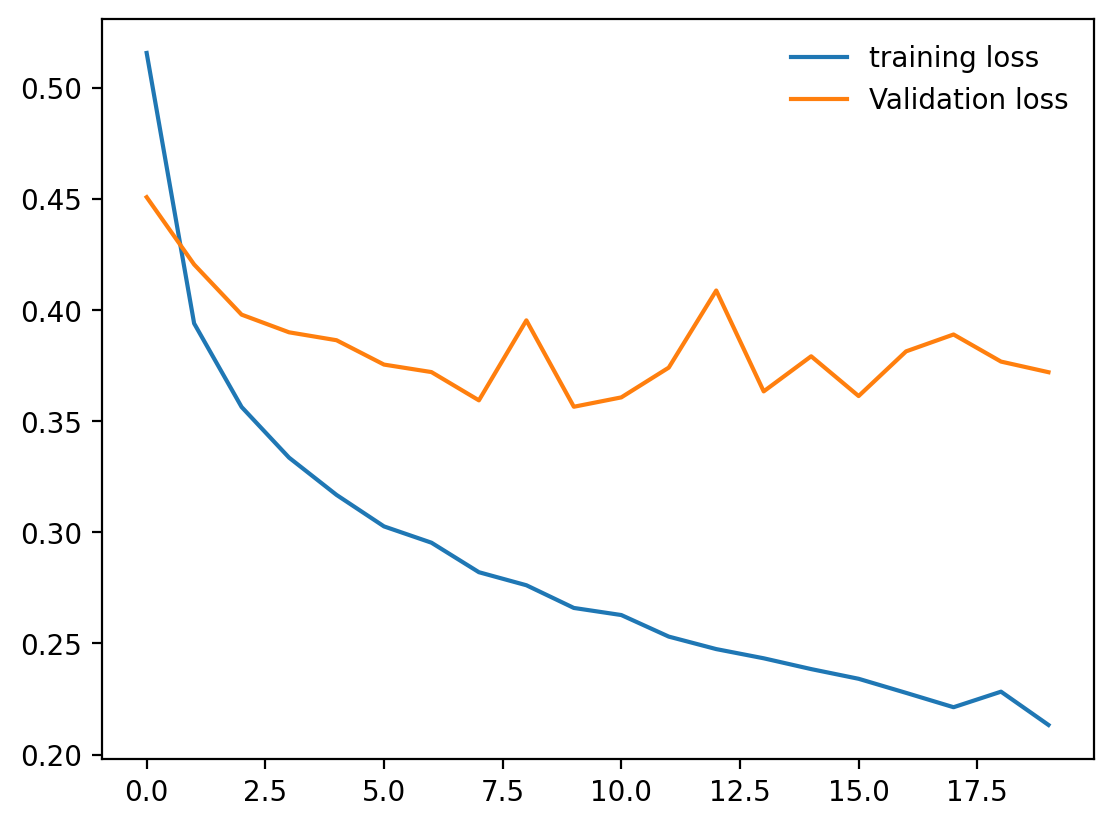

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='retina'


plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [12]:
# Overfitting 확인 후 해결책 (Drop out 적용...)
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

        # 기본값 : 0.5 dropout 설정..
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = x.view(x.shape[0], -1)

        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))

        # output은 dropout하면 안된다..
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [13]:
# Drop out 주의 = Training 과정에서만...
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

epochs = 20
steps = 0

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:

        optimizer.zero_grad()

        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            # test 과정에 들어가지만 Drop out을 안하게 된다.
            # Drop out 하는 비율이 0이 된다.
            model.eval()
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)

                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        # 다시 트레이닝
        model.train()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(train_losses[-1]),
              "Test Loss: {:.3f}.. ".format(test_losses[-1]),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))


Epoch: 1/20..  Training Loss: 0.605..  Test Loss: 0.480..  Test Accuracy: 0.829
Epoch: 2/20..  Training Loss: 0.485..  Test Loss: 0.439..  Test Accuracy: 0.835
Epoch: 3/20..  Training Loss: 0.452..  Test Loss: 0.425..  Test Accuracy: 0.847
Epoch: 4/20..  Training Loss: 0.434..  Test Loss: 0.402..  Test Accuracy: 0.855
Epoch: 5/20..  Training Loss: 0.416..  Test Loss: 0.399..  Test Accuracy: 0.859
Epoch: 6/20..  Training Loss: 0.405..  Test Loss: 0.390..  Test Accuracy: 0.866
Epoch: 7/20..  Training Loss: 0.408..  Test Loss: 0.398..  Test Accuracy: 0.862
Epoch: 8/20..  Training Loss: 0.402..  Test Loss: 0.388..  Test Accuracy: 0.861
Epoch: 9/20..  Training Loss: 0.390..  Test Loss: 0.404..  Test Accuracy: 0.854
Epoch: 10/20..  Training Loss: 0.385..  Test Loss: 0.387..  Test Accuracy: 0.863
Epoch: 11/20..  Training Loss: 0.388..  Test Loss: 0.380..  Test Accuracy: 0.869
Epoch: 12/20..  Training Loss: 0.378..  Test Loss: 0.390..  Test Accuracy: 0.859
Epoch: 13/20..  Training Loss: 0.381.

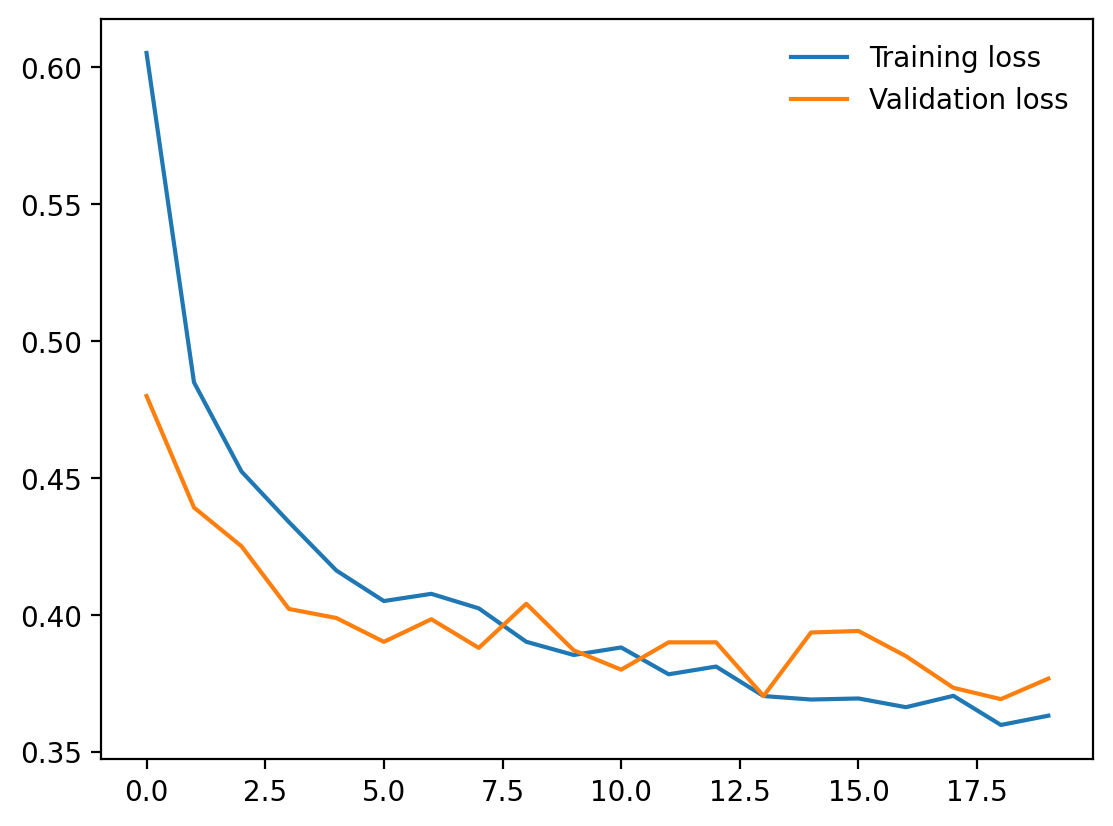

In [14]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)